In [24]:
#Cluster Exploration

In [25]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_distances

In [26]:
# 5000 songs csv files:
df5000songs = pd.read_csv("5000songs.csv")
df5000min_max = pd.read_csv("5000min_max.csv")
df5000robust = pd.read_csv("5000robust.csv")

In [27]:
#Inertia and Silhouette Score:

In [28]:
#Inertia:

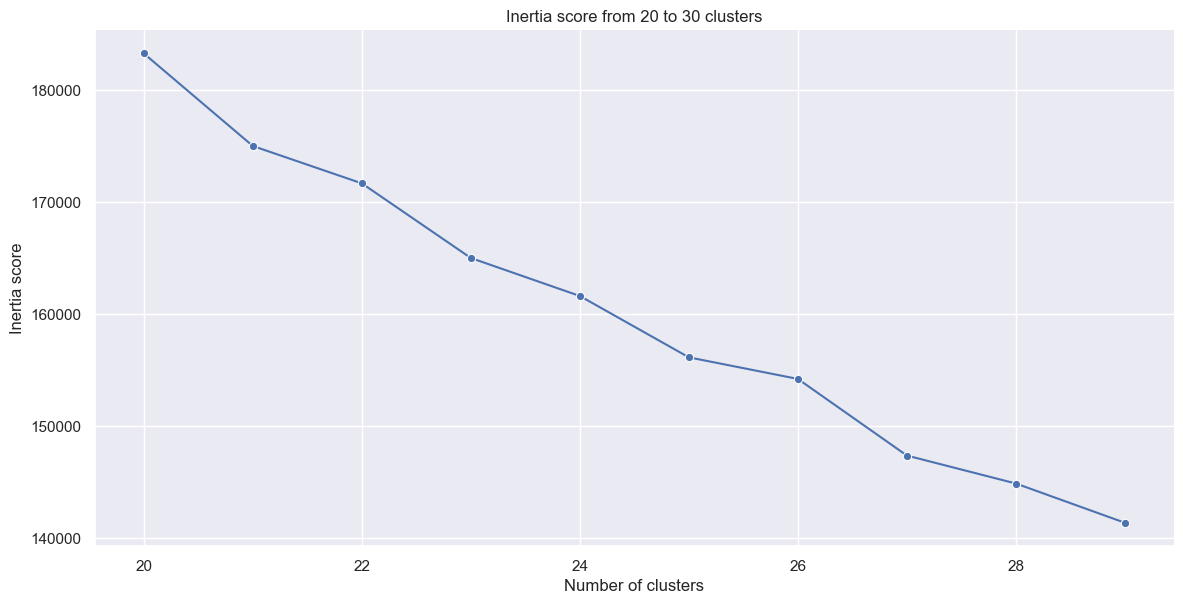

In [29]:
# Calculating inertia for min-max
df5000songs.set_index('title', inplace=True) 
max_clusters = 30

inertia_list_st = []

for i in range(20,max_clusters):
  model_loop = KMeans(n_clusters=i,n_init=10,random_state=123)
  model_loop.fit(df5000songs)
  inertia_list_st.append(round(model_loop.inertia_,3))

#print(inertia_list_st) # to see if it worked 

#Elbowmethod
sns.set_theme(style='darkgrid')
(sns.relplot(kind='line',x=range(20,max_clusters),y=inertia_list_st,marker='o',height=6,aspect=2)
    .set(title=f"Inertia score from 20 to {max_clusters} clusters")
    .set_axis_labels("Number of clusters", "Inertia score")
);

In [30]:
###Silhouette:

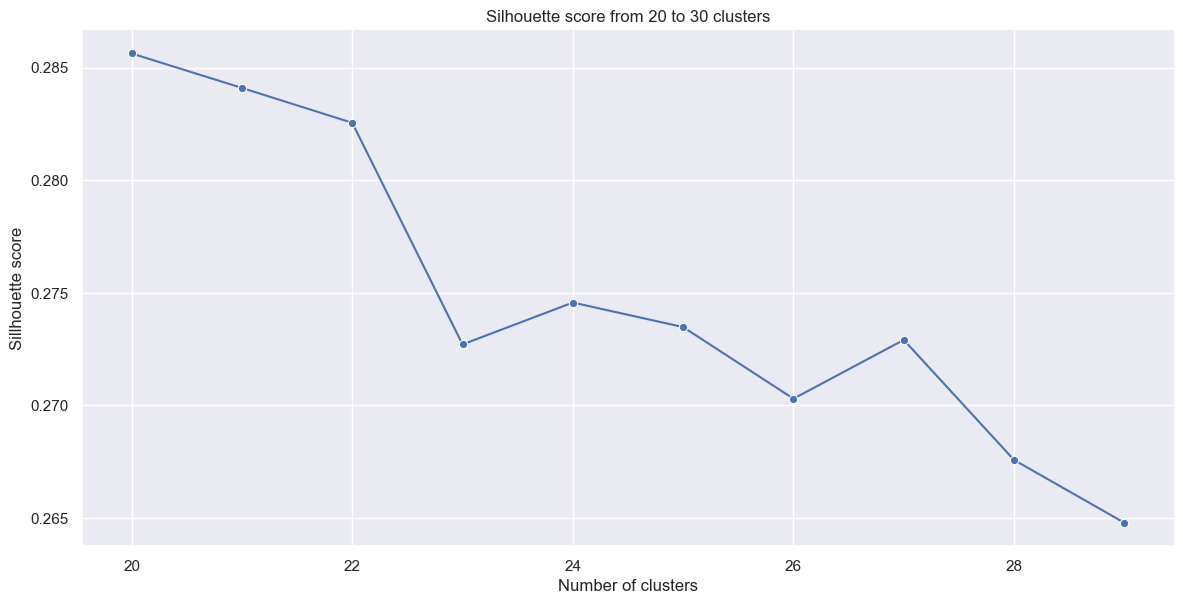

In [31]:
# Same for Silhouette:
max_clusters = 30

silhouette_list = []

for i in range(20,max_clusters):
  model_loop = KMeans(n_clusters=i,n_init=10,random_state=123)
  model_loop.fit(df5000songs)
  score = silhouette_score(df5000songs,model_loop.labels_)
  silhouette_list.append(round(score,5))
  
# Visualized:
sns.set_theme(style='darkgrid')
(sns.relplot(kind='line',x=range(20,max_clusters),y=silhouette_list,marker='o',height=6,aspect=2)
    .set(title=f"Silhouette score from 20 to {max_clusters} clusters")
    .set_axis_labels("Number of clusters", "Sillhouette score")
);

In [32]:
##Adding 40 Cluster on Scaled dataframe to then output in a new .csv for Modelling:

In [33]:
# copying to not mess up...
scaled_clustered_5000songs = df5000quantile.copy()
# 40 clusters
final_model = KMeans(n_clusters=40, random_state=123)
final_model.fit(df5000quantile)
# Labelling
scaled_clustered_5000songs['cluster']  = final_model.labels_
scaled_clustered_5000songs.sample(5) # see if it worked
# output csv
scaled_clustered_5000songs.to_csv('final5000.csv')

NameError: name 'df5000quantile' is not defined

In [ ]:
##Additional Heatmap for comparison:

In [ ]:
distances_centroids = pairwise_distances(final_model.cluster_centers_)
sns.heatmap(distances_centroids)